In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

# Importing Data

In [3]:
df_customers=pd.read_csv(r"C:\Users\Nitin Agrawal\Downloads\customers.csv")
df_loans=pd.read_csv(r"C:\Users\Nitin Agrawal\Downloads\loans.csv")
df_bureau=pd.read_csv(r"C:\Users\Nitin Agrawal\Downloads\bureau_data.csv")

In [4]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,24-07-2019,10-08-2019,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,24-07-2019,15-08-2019,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,24-07-2019,21-08-2019,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,24-07-2019,09-08-2019,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,24-07-2019,02-08-2019,False


In [6]:
df=df_customers.merge(df_loans,on="cust_id")

In [7]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [8]:
df=df.merge(df_bureau,on="cust_id")

In [9]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,24-07-2019,10-08-2019,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,24-07-2019,15-08-2019,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,24-07-2019,21-08-2019,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,24-07-2019,09-08-2019,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,24-07-2019,02-08-2019,False,4,2,120,0,0,5,10


In [10]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns="default"),df["default"], test_size=0.2, random_state=42)

In [11]:
df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

# Data Cleaning

In [12]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 53
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [13]:
df_test.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 9
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [14]:
mode_residance=df_train["residence_type"].mode()[0]
mode_residance

'Owned'

In [15]:
df["residence_type"].value_counts()

residence_type
Owned       28238
Mortgage    11819
Rented       9881
Name: count, dtype: int64

In [16]:
df_train["residence_type"].fillna(mode_residance,inplace=True)

In [17]:
df_test["residence_type"].fillna(mode_residance,inplace=True)

In [18]:
df_train.duplicated().sum()

0

In [19]:
df_test.duplicated().sum()

0

In [20]:
df_train.select_dtypes(include=["int64","float64"]).columns
df_train.select_dtypes(include="object").columns

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [21]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']


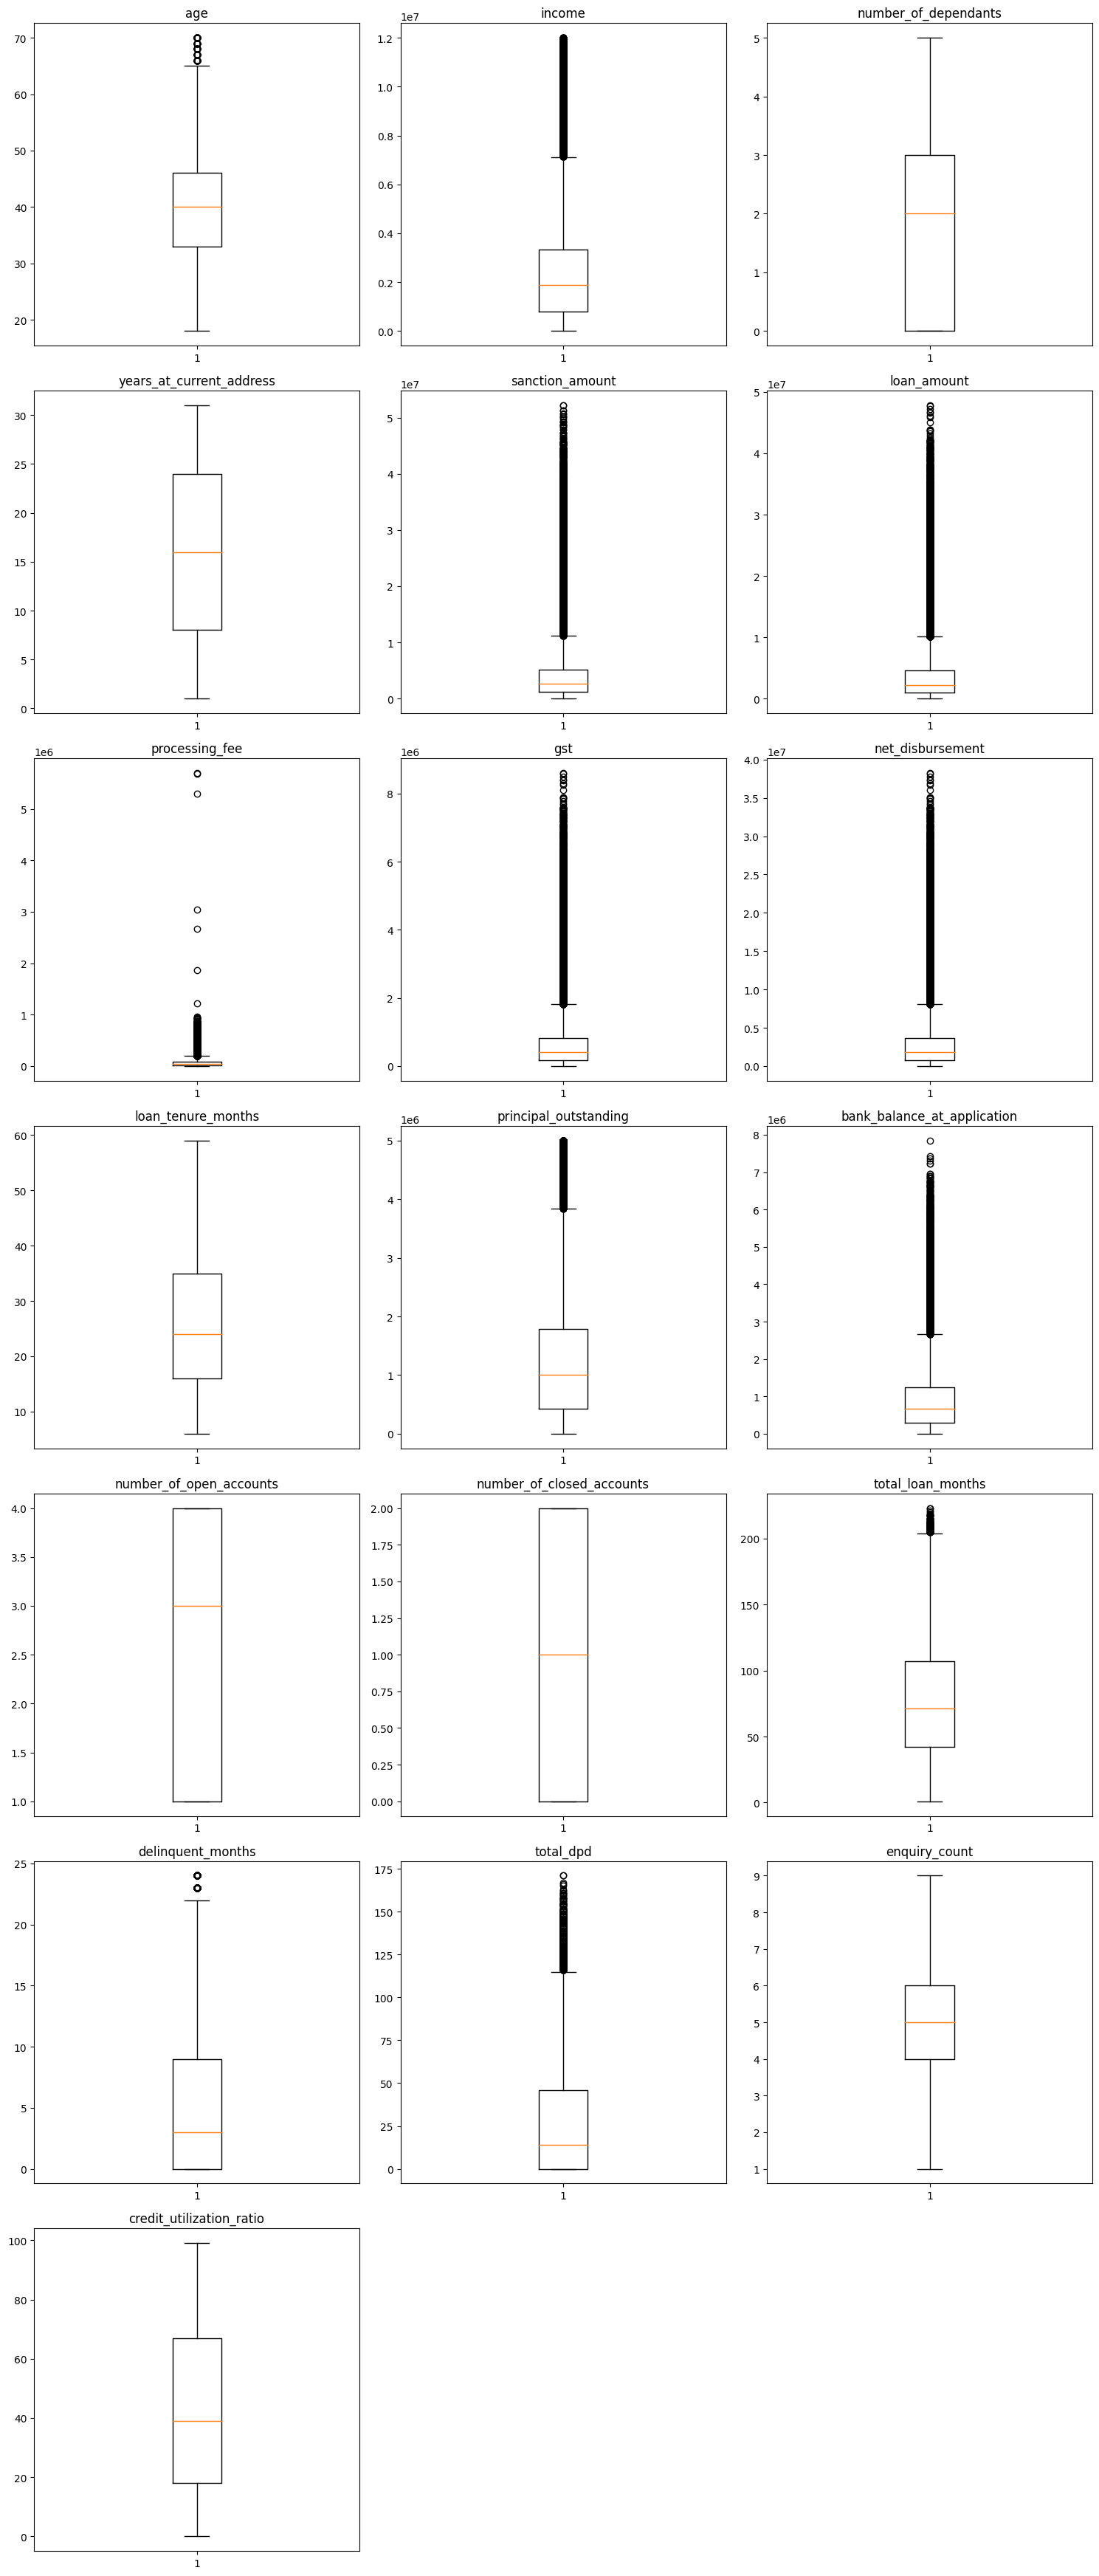

In [22]:
rows = (len(columns_continuous) + 2) //3
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten() 

for i, col in enumerate(columns_continuous):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [23]:
df_train['processing_fee'].describe()

count    4.000000e+04
mean     8.082281e+04
std      1.203019e+05
min      0.000000e+00
25%      1.922000e+04
50%      4.472000e+04
75%      9.206500e+04
max      5.698030e+06
Name: processing_fee, dtype: float64

In [24]:
df_train["loan_amount"].describe()

count    4.000000e+04
mean     4.009820e+06
std      5.413829e+06
min      0.000000e+00
25%      9.610000e+05
50%      2.235500e+06
75%      4.602000e+06
max      4.781900e+07
Name: loan_amount, dtype: float64

In [25]:
df["processing_fee"].max()/df_train["loan_amount"].max()*100

11.915828229364896

In [26]:
df_train[df_train["processing_fee"]>0.03*df_train['loan_amount']]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
23981,C23982,33,F,Single,Self-Employed,1790000,0,Rented,7,Kolkata,...,15-12-2021,14-01-2022,4,2,154,9,31,6,26,False
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,19-07-2020,11-08-2020,2,1,51,1,5,3,92,False
47089,C47090,37,M,Married,Self-Employed,1892000,2,Rented,13,Jaipur,...,07-04-2024,15-04-2024,3,0,112,5,33,3,32,False
33705,C33706,54,M,Married,Self-Employed,10763000,2,Mortgage,5,Ahmedabad,...,05-12-2022,30-12-2022,3,1,140,0,0,5,47,False
12294,C12295,49,M,Married,Salaried,3504000,2,Rented,24,Ahmedabad,...,15-10-2020,23-10-2020,1,2,58,0,0,3,86,False
28174,C28175,36,F,Single,Self-Employed,1123000,1,Rented,31,Hyderabad,...,18-05-2022,05-06-2022,3,0,111,8,41,3,62,False
29305,C29306,52,M,Married,Self-Employed,3839000,2,Owned,11,Delhi,...,28-06-2022,21-07-2022,2,2,42,11,65,3,2,False


In [27]:
df_train_1=df_train[df_train["processing_fee"]<0.03*df_train['loan_amount']].copy()

In [28]:
df_test=df_test[df_test["processing_fee"]<0.03*df_test['loan_amount']].copy()

In [29]:
for col in columns_categorical:
    print(col, "-->", df_train_1[col].unique())

gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Lucknow' 'Delhi' 'Chennai' 'Jaipur' 'Pune' 'Bangalore' 'Kolkata'
 'Hyderabad' 'Mumbai' 'Ahmedabad']
state --> ['Uttar Pradesh' 'Delhi' 'Tamil Nadu' 'Rajasthan' 'Maharashtra'
 'Karnataka' 'West Bengal' 'Telangana' 'Gujarat']
zipcode --> [226001 110001 600001 302001 411001 560001 700001 500001 400001 380001]
loan_purpose --> ['Personal' 'Home' 'Education' 'Auto' 'Personaal']
loan_type --> ['Unsecured' 'Secured']
default --> [False  True]


In [30]:
df_train_1["loan_purpose"].value_counts()

loan_purpose
Personal     14013
Home         12003
Auto          7947
Education     6006
Personaal       18
Name: count, dtype: int64

In [31]:
df_train_1["loan_purpose"]=df_train_1["loan_purpose"].replace("Personaal","Personal")

In [32]:
df_test["loan_purpose"]=df_test["loan_purpose"].replace("Personaal","Personal")

In [33]:
df_test["loan_purpose"].unique()

array(['Education', 'Home', 'Auto', 'Personal'], dtype=object)

# EDA

In [34]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

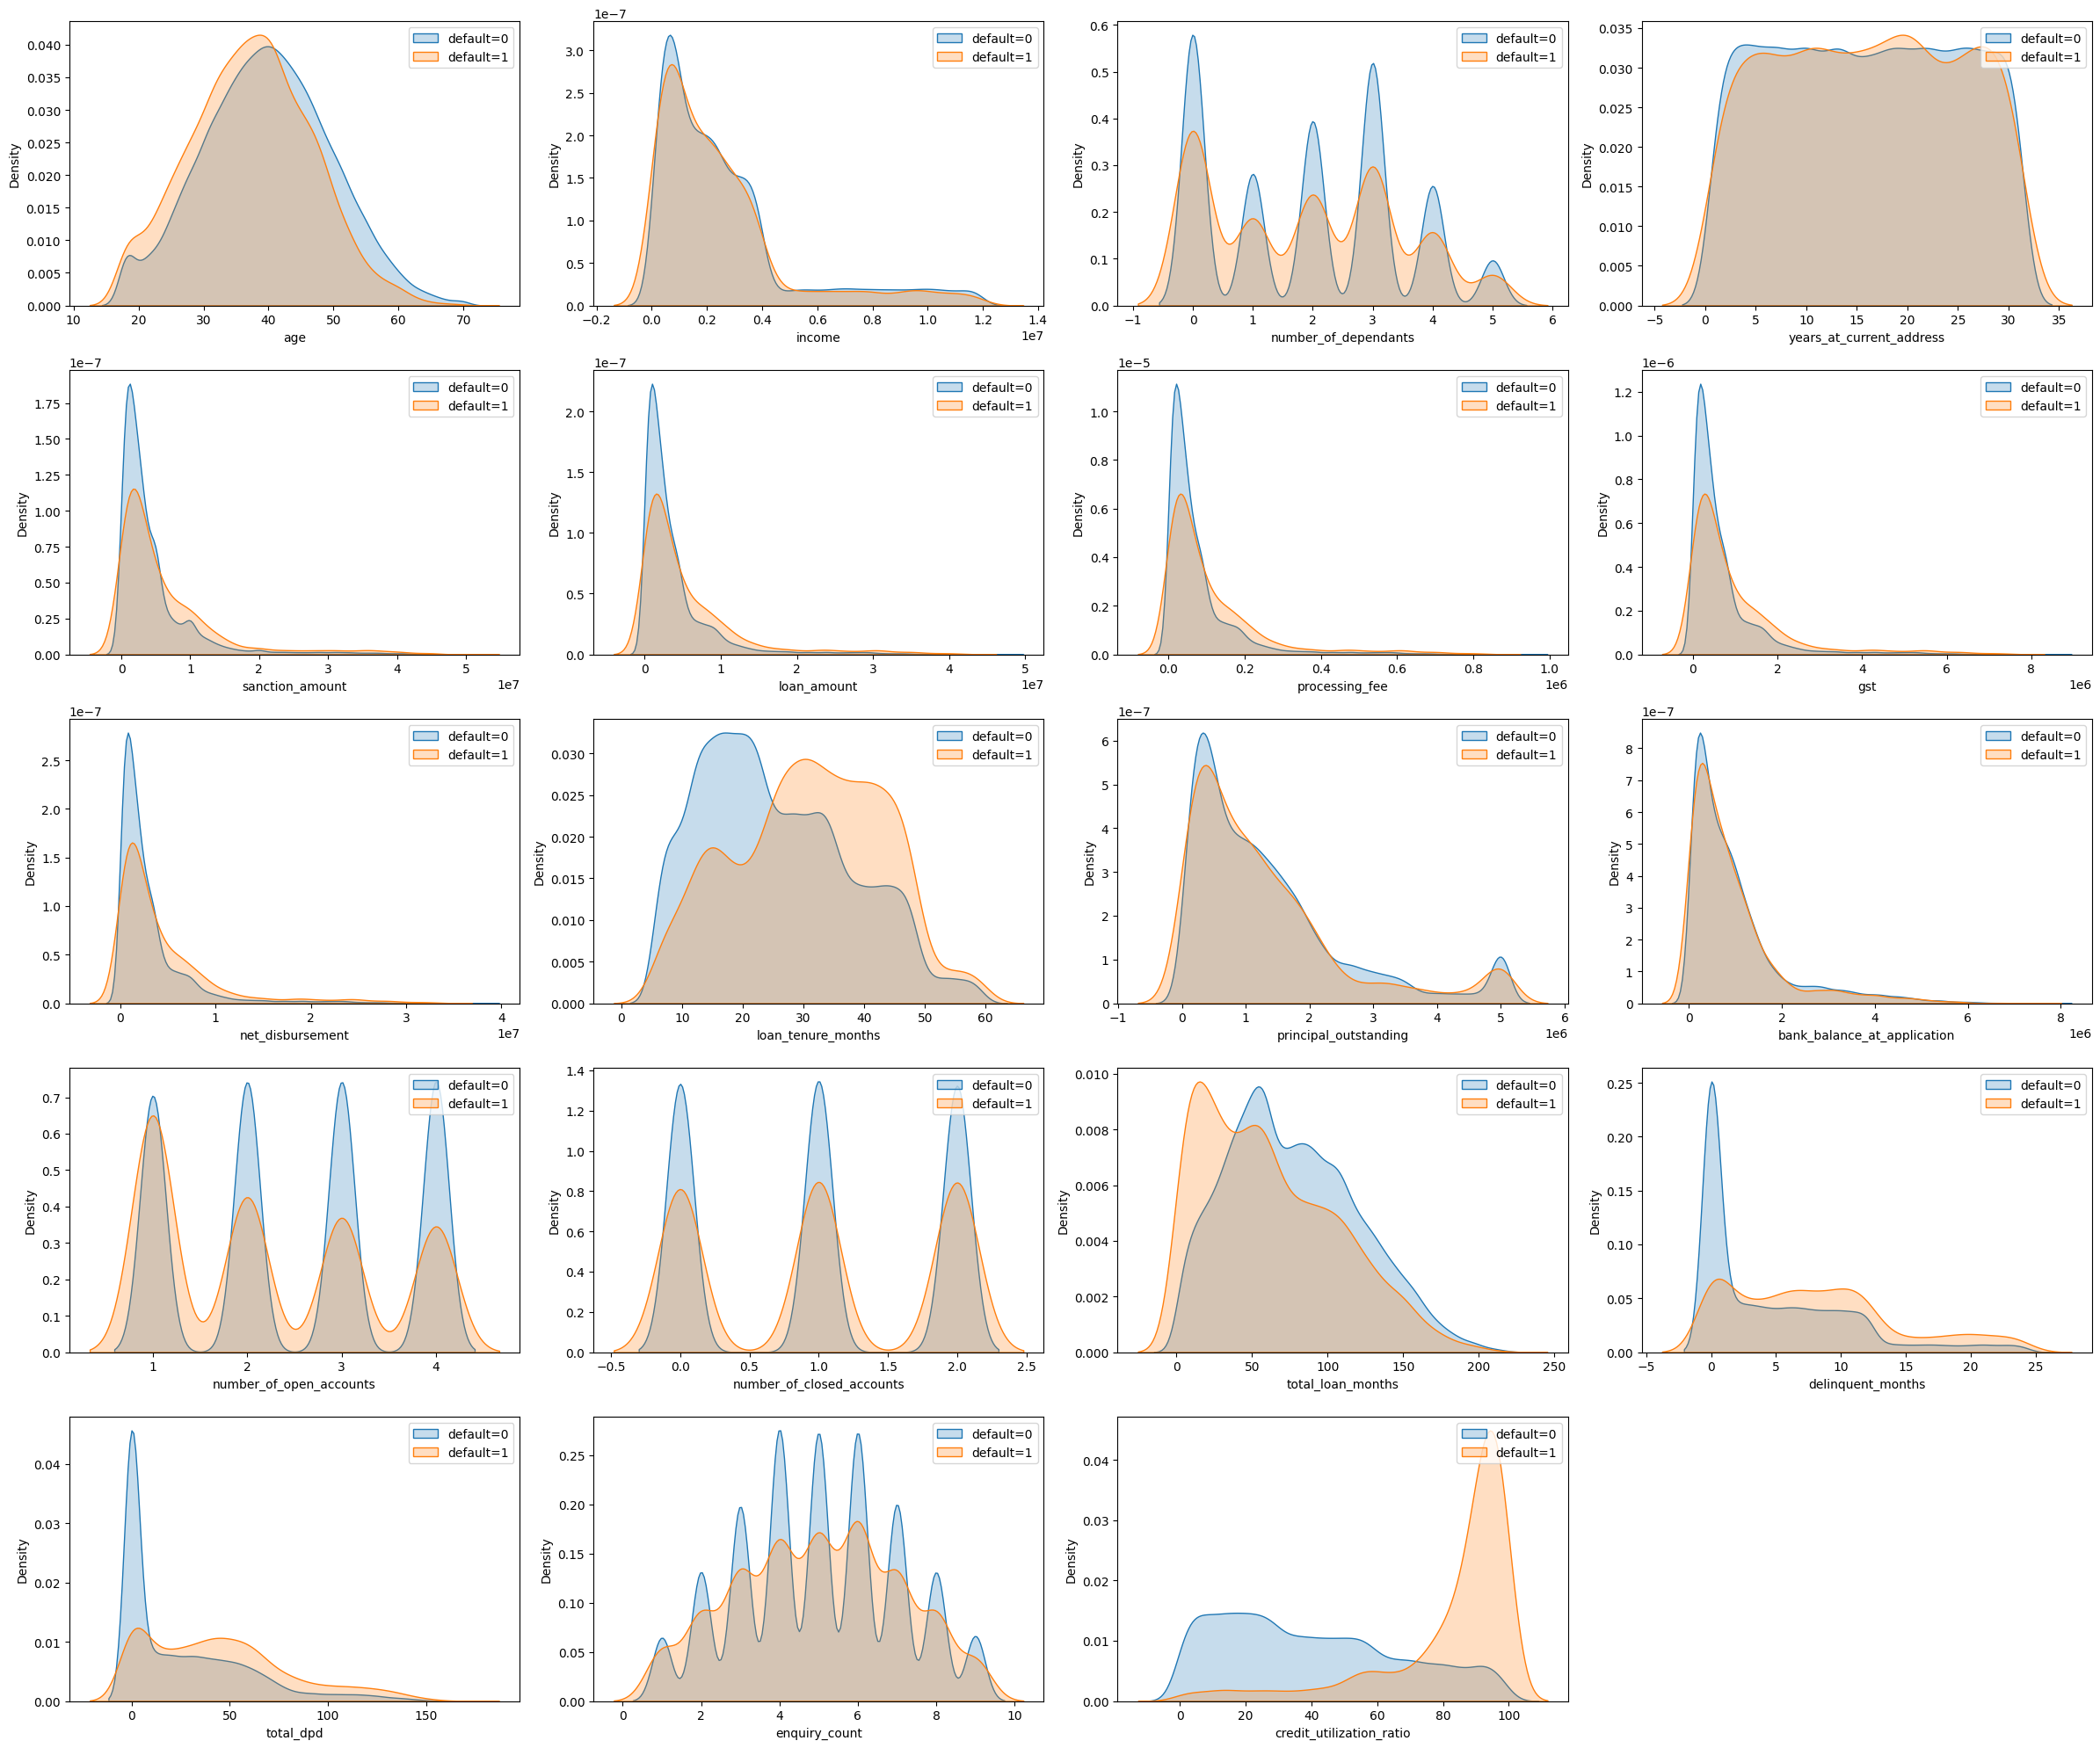

In [35]:
rows = (len(columns_continuous) + 2) // 4 
fig, axes = plt.subplots(rows, 4, figsize=(24,20))
axes = axes.flatten() 
for i, col in enumerate(columns_continuous):
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True,ax=axes[i],label='default=0',legend=True)
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True,ax=axes[i], label='default=1',legend=True) 
    axes[i].legend()
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

In [36]:
df_train_1["loan_to_income"]=round(df_train["loan_amount"]/df_train["income"],2)
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)

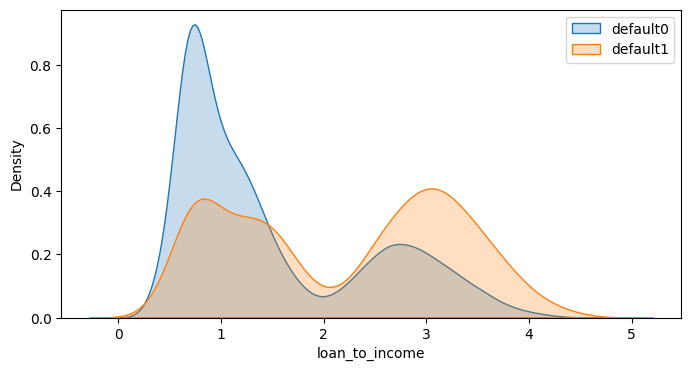

In [37]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1[df_train_1["default"]==0]["loan_to_income"],fill=True,label="default0")
sns.kdeplot(df_train_1[df_train_1["default"]==1]["loan_to_income"],fill=True,label="default1")
plt.legend()
plt.show()

In [38]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(1)

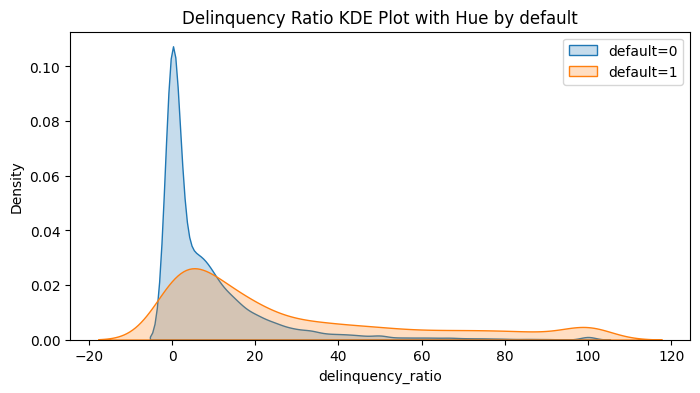

In [39]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [40]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)
df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

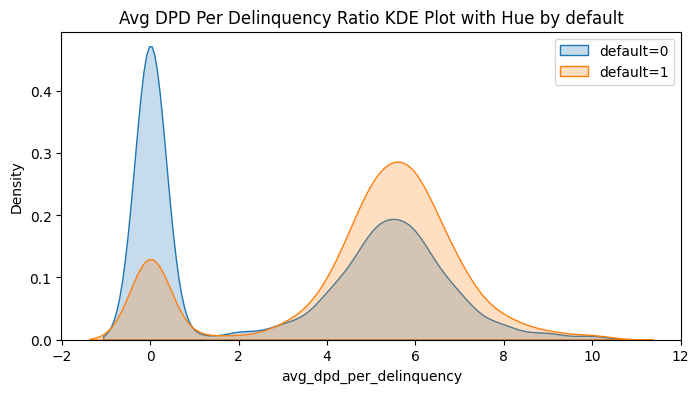

In [41]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

# Feature Selection

In [42]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test = df_test.drop(['cust_id', 'loan_id'],axis="columns")

In [43]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [44]:
numeric_columns=df_train_3.select_dtypes(include=["int64","float64"]).columns

In [45]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X_train[numeric_columns]=scalar.fit_transform(X_train[numeric_columns])

In [46]:
X_train[numeric_columns].head()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
39087,0.211538,0.4,0.033333,0.196610,0.012110,0.013335,0.013335,0.013335,0.283019,0.091251,0.025975,0.666667,1.0,0.500,0.929293,0.135831,0.000,0.00
30893,0.346154,0.8,0.800000,0.000000,0.202096,0.214030,0.214030,0.214030,0.452830,0.327848,0.156704,0.666667,1.0,0.250,0.535354,0.742389,0.128,0.70
45278,0.326923,0.6,0.866667,0.830508,0.350242,0.336934,0.336934,0.336934,0.433962,0.592846,0.170276,0.666667,1.0,0.250,0.050505,0.601874,0.015,0.50
16398,0.596154,0.6,0.200000,0.830508,0.054276,0.056773,0.056773,0.056773,0.207547,0.393360,0.206666,0.333333,0.0,0.500,0.161616,0.081967,0.000,0.00
13653,0.365385,0.0,0.500000,0.830508,0.012302,0.012602,0.012602,0.012602,0.584906,0.035373,0.013898,1.000000,0.5,0.375,0.111111,0.332553,0.050,0.66


In [47]:
X_test= df_test.drop('default', axis='columns')
y_test = df_test['default']
X_test[numeric_columns]=scalar.transform(X_test[numeric_columns])

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] =[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_data

In [49]:
calculate_vif(X_train[numeric_columns])

C:\Users\Nitin Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,age,5.720843
1,number_of_dependants,2.727926
2,years_at_current_address,3.424520
3,zipcode,3.796425
4,sanction_amount,101.375523
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.131251
9,principal_outstanding,16.286346


In [50]:
X_train_1=X_train.drop(columns=['processing_fee', 'gst',"principal_outstanding","sanction_amount"],axis=1)
numeric_columns=X_train_1.select_dtypes(["int64","float64"]).columns
calculate_vif(X_train_1[numeric_columns])

,feature,VIF
0,age,5.465867
1,number_of_dependants,2.727589
2,years_at_current_address,3.422632
3,zipcode,3.794253
4,net_disbursement,4.651300
5,loan_tenure_months,5.980242
6,bank_balance_at_application,4.192867
7,number_of_open_accounts,4.325681
8,number_of_closed_accounts,2.365745
9,enquiry_count,6.384000


# Weight of evidence and information value

In [51]:
def calculate_iv(df,feature,target):
    grouped=df.groupby(feature)[target].agg(["count","sum"])
    grouped.rename(columns={"count":"total","sum":"good"},inplace=True)
    grouped["bad"]=grouped["total"]-grouped["good"]
    grouped["good_pct"]=grouped["good"]/grouped["good"].sum()
    grouped["bad_pct"]=grouped["bad"]/grouped["bad"].sum()
    grouped["woe"]=np.log( grouped["good_pct"]/grouped["bad_pct"])
    grouped["iv"]= grouped["woe"]*(grouped["good_pct"]-grouped["bad_pct"])
    total_iv = grouped['iv'].sum()
    return total_iv


In [52]:
iv_values={}
for feature in X_train_1.columns:
    if X_train_1[feature].dtype=="object":
        iv=calculate_iv(pd.concat([X_train_1,y_train],axis=1),feature,"default")
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        iv = calculate_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature]=iv
iv_values


C:\Users\Nitin Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'age': 0.07668845616983133,
 'gender': 0.0005252221534668387,
 'marital_status': 0.0017548924448790612,
 'employment_status': 0.0025063248599747653,
 'number_of_dependants': 0.002977979675793198,
 'residence_type': 0.2544613313080765,
 'years_at_current_address': 0.001383430766914449,
 'city': 0.0006329995470511145,
 'state': 0.0006284621608370921,
 'zipcode': 0.0006324964364876762,
 'loan_purpose': 0.3872402817840378,
 'loan_type': 0.16888218833539492,
 'net_disbursement': inf,
 'loan_tenure_months': 0.23017122426003067,
 'bank_balance_at_application': 0.005320756307500039,
 'number_of_open_accounts': 0.0780671613772511,
 'number_of_closed_accounts': 0.0003744080466105261,
 'enquiry_count': 0.005561748920422708,
 'credit_utilization_ratio': 2.4265085265949526,
 'loan_to_income': 0.48823891855073287,
 'delinquency_ratio': 0.678042778646962,
 'avg_dpd_per_delinquency': 0.40737964919244773}

In [53]:
iv_df=pd.DataFrame(iv_values.items(),columns=["feature","iv"])
iv_df

,feature,iv
0,age,0.076688
1,gender,0.000525
2,marital_status,0.001755
3,employment_status,0.002506
4,number_of_dependants,0.002978
5,residence_type,0.254461
6,years_at_current_address,0.001383
7,city,0.000633
8,state,0.000628
9,zipcode,0.000632


In [54]:
selected_features=[]
selected_features = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'net_disbursement',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [55]:
X_train_reduced = X_train_1[selected_features]
X_test_reduced = X_test[selected_features]

In [56]:
X_train_reduced.shape

(39987, 11)

In [57]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,net_disbursement,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
39087,0.211538,Owned,Personal,Unsecured,0.013335,0.283019,0.666667,0.929293,0.135831,0.000,0.00
30893,0.346154,Mortgage,Home,Secured,0.214030,0.452830,0.666667,0.535354,0.742389,0.128,0.70
45278,0.326923,Owned,Home,Secured,0.336934,0.433962,0.666667,0.050505,0.601874,0.015,0.50
16398,0.596154,Rented,Personal,Unsecured,0.056773,0.207547,0.333333,0.161616,0.081967,0.000,0.00
13653,0.365385,Owned,Education,Secured,0.012602,0.584906,1.000000,0.111111,0.332553,0.050,0.66


# Feature Engineering

In [58]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,net_disbursement,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
39087,0.211538,0.013335,0.283019,0.666667,0.929293,0.135831,0.000,0.0,True,False,False,False,True,True
30893,0.346154,0.214030,0.452830,0.666667,0.535354,0.742389,0.128,0.7,False,False,False,True,False,False
45278,0.326923,0.336934,0.433962,0.666667,0.050505,0.601874,0.015,0.5,True,False,False,True,False,False


In [59]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,net_disbursement,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346154,0.097637,0.528302,0.333333,0.121212,0.257611,0.043,0.9,True,False,True,False,False,False
9427,0.288462,0.183801,0.622642,1.000000,0.858586,0.688525,0.000,0.0,True,False,False,True,False,False
199,0.192308,0.066549,0.622642,1.000000,0.727273,0.634660,0.000,0.0,True,False,False,True,False,False


# Training Model

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.97      0.99      0.98      9137
        True       0.82      0.72      0.77       861

    accuracy                           0.96      9998
   macro avg       0.90      0.85      0.87      9998
weighted avg       0.96      0.96      0.96      9998



In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.97      0.99      0.98      9137
        True       0.84      0.69      0.76       861

    accuracy                           0.96      9998
   macro avg       0.90      0.84      0.87      9998
weighted avg       0.96      0.96      0.96      9998



In [62]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      9137
        True       0.81      0.74      0.77       861

    accuracy                           0.96      9998
   macro avg       0.89      0.86      0.88      9998
weighted avg       0.96      0.96      0.96      9998



# Random Search CV

In [63]:
from sklearn.model_selection import RandomizedSearchCV
log_reg=LogisticRegression(max_iter=1000)
param_grid={'C': np.logspace(-4, 4, 20), "solver":["newton-cg", "sag","lbfgs"]}
random_search=RandomizedSearchCV(log_reg,param_distributions=param_grid,n_iter=50, scoring='f1', n_jobs=-1,cv=3,verbose=2,random_state=42)
random_search.fit(X_train_encoded, y_train)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")
best_model = random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'sag', 'C': 29.763514416313132}
Best Score: 0.7649699468819842


In [64]:
y_pred=best_model.predict(X_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      9137
        True       0.81      0.74      0.77       861

    accuracy                           0.96      9998
   macro avg       0.89      0.86      0.88      9998
weighted avg       0.96      0.96      0.96      9998



In [65]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0] 
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.7931888042319399


In [66]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      9137
        True       0.78      0.83      0.80       861

    accuracy                           0.96      9998
   macro avg       0.88      0.90      0.89      9998
weighted avg       0.97      0.96      0.97      9998



# Under Sampling

In [67]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)
X_train_res,y_train_res=rus.fit_resample(X_train_encoded,y_train)

In [68]:
y_train.value_counts()

default
False    36551
True      3436
Name: count, dtype: int64

In [69]:
y_train_res.value_counts()

default
False    3436
True     3436
Name: count, dtype: int64

In [70]:
model = LogisticRegression(solver='sag', C=29.763514416313132)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      0.92      0.96      9137
        True       0.53      0.95      0.68       861

    accuracy                           0.92      9998
   macro avg       0.76      0.94      0.82      9998
weighted avg       0.96      0.92      0.93      9998



In [71]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      0.91      0.95      9137
        True       0.52      0.98      0.68       861

    accuracy                           0.92      9998
   macro avg       0.76      0.95      0.82      9998
weighted avg       0.96      0.92      0.93      9998



# Over Sampling

In [72]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
False    36489
True     36489
Name: count, dtype: int64

In [73]:
model = LogisticRegression(solver='sag', C=29.763514416313132)
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.99      0.93      0.96      9137
        True       0.55      0.94      0.70       861

    accuracy                           0.93      9998
   macro avg       0.77      0.93      0.83      9998
weighted avg       0.96      0.93      0.94      9998



In [74]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      0.94      0.97      9137
        True       0.59      0.95      0.73       861

    accuracy                           0.94      9998
   macro avg       0.79      0.94      0.85      9998
weighted avg       0.96      0.94      0.95      9998



# Optuna

In [75]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [76]:
def objective(trial):
    param={'C':trial.suggest_float('C', 1e-4, 1e4, log=True),
    'solver':trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),
    'tol':trial.suggest_float('tol', 1e-6, 1e-1, log=True),
    'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])}
    model = LogisticRegression(**param, max_iter=10000)
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    return np.mean(scores)



In [77]:
study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-10-05 23:43:16,483] A new study created in memory with name: no-name-f03f9b2a-0fd0-49dc-bcb4-c73ca8390092
[I 2025-10-05 23:43:16,816] Trial 0 finished with value: 0.9275528906907065 and parameters: {'C': 0.02030572811055578, 'solver': 'liblinear', 'tol': 0.0006750625161412748, 'class_weight': None}. Best is trial 0 with value: 0.9275528906907065.
[I 2025-10-05 23:43:17,735] Trial 1 finished with value: 0.9448596599794133 and parameters: {'C': 287.920898453707, 'solver': 'newton-cg', 'tol': 6.725154426288293e-05, 'class_weight': None}. Best is trial 1 with value: 0.9448596599794133.
[I 2025-10-05 23:43:18,343] Trial 2 finished with value: 0.9448596160589912 and parameters: {'C': 114.62878400961142, 'solver': 'liblinear', 'tol': 3.1765367576367797e-06, 'class_weight': None}. Best is trial 1 with value: 0.9448596599794133.
[I 2025-10-05 23:43:18,794] Trial 3 finished with value: 0.9402758402960044 and parameters: {'C': 0.11042462866272813, 'solver': 'lbfgs', 'tol': 1.1297094774480

In [78]:
study_logistic .best_params

{'C': 55.23823621307662,
 'solver': 'newton-cg',
 'tol': 4.481212564497979e-06,
 'class_weight': None}

In [79]:
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.99      0.93      0.96      9137
        True       0.55      0.94      0.70       861

    accuracy                           0.93      9998
   macro avg       0.77      0.93      0.83      9998
weighted avg       0.96      0.93      0.94      9998



In [80]:
best_model_logistic

LogisticRegression(C=55.23823621307662, solver='newton-cg',
                   tol=4.481212564497979e-06)

# ROC AUC

In [81]:
from sklearn.metrics import roc_curve

probabilities =best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00010945, 0.00010945]),
 array([0.        , 0.00116144, 0.19279907, 0.19279907, 0.27990708]),
 array([       inf, 0.99999997, 0.99919333, 0.99918316, 0.99773692]))

In [82]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area.round(2)

0.98

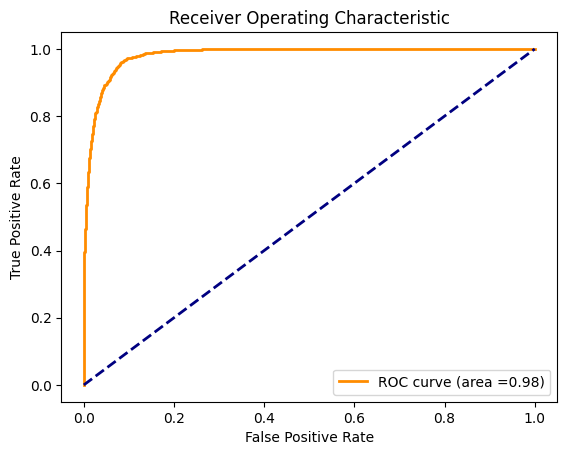

In [83]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area ={area.round(2)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [89]:
df_imp=pd.DataFrame()
df_imp["feature"]=X_train_encoded.columns
df_imp["coefficients"]=best_model_logistic.coef_[0]
df_imp=df_imp.sort_values(by="coefficients",ascending=False)

<Axes: xlabel='coefficients', ylabel='feature'>

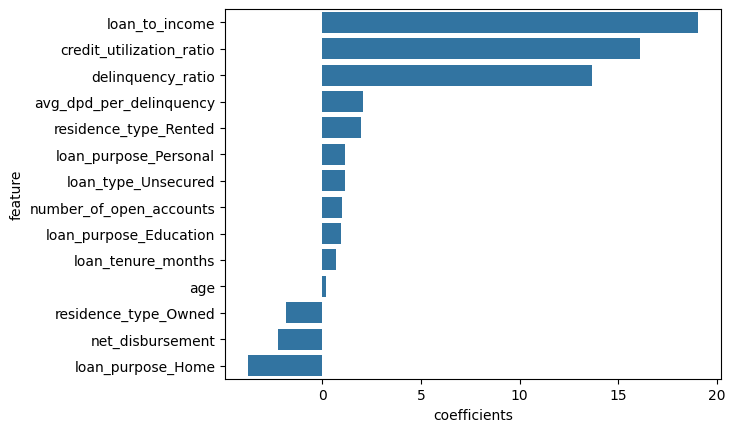

In [90]:
sns.barplot(x=df_imp["coefficients"],y=df_imp["feature"])